This notebook is for re-doing the analysis for Abstract 2 using area strains instead of longitudinal strains

Using pyvista

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from hrs_23_figures import *
import pyvista as pv
from scipy import stats
from scipy.stats import pearsonr

all_cases = af_cases + nonaf_cases

len(all_cases)

29

2.116925557672909e-05


Text(0, 0.5, 'Strain Standard Deviatio')

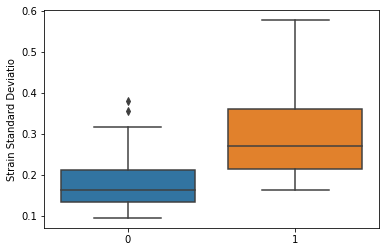

In [16]:
## Using percentiles filters

frame=4
upper_percent=99
fibre_arch="endo_avg"

endo_avg=np.zeros((len(all_cases),))
area=np.zeros((len(all_cases),))

for i in range(0, len(all_cases)):
#     print(case)
    case=all_cases[i]
    
    data = retrieve_fibres_all_data(case, fibre_arch, frame)['f1']
    data_bounds = np.percentile(data, [0, upper_percent])
    condition = data[:] > data_bounds[1]
    data[condition]=np.nan
    
    area_data = retrieve_area_strain_all_data(case, 'area', frame)['Area']
#     long_data_bounds = np.percentile(long_data, [0, upper_percent])
#     condition_l = long_data[:] > long_data_bounds[1]
#     long_data[condition_l]=np.nan
    
#     area_data = area_data.apply(np.sqrt)
    
    std = np.nanstd(data)
    std_a = np.nanstd(area_data)
    
    endo_avg[i]=std
    area[i]=std_a
    
#     print(case, "\t", std, "\t", std_l)

data_to_plot = [endo_avg, area]

sns.boxplot(data=data_to_plot)

p_val = stats.ttest_ind(endo_avg, area)[-1]
print(p_val)

# plt.ylim(0, 0.5)
plt.ylabel("Strain Standard Deviatio")
## Comment: little difference in global stddev between long and fib

0.003587077487487608


Text(0, 0.5, 'Strain Standard Deviatio')

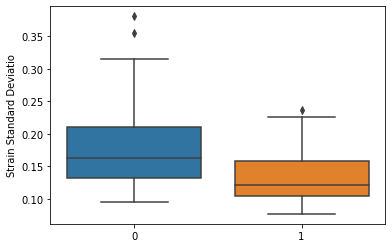

In [17]:
## Using percentiles filters

frame=4
upper_percent=99
fibre_arch="endo_avg"

endo_avg=np.zeros((len(all_cases),))
area=np.zeros((len(all_cases),))

for i in range(0, len(all_cases)):
#     print(case)
    case=all_cases[i]
    
    data = retrieve_fibres_all_data(case, fibre_arch, frame)['f1']
    data_bounds = np.percentile(data, [0, upper_percent])
    condition = data[:] > data_bounds[1]
    data[condition]=np.nan
    
    area_data = retrieve_area_strain_all_data(case, 'squeez', frame)['Area']
#     long_data_bounds = np.percentile(long_data, [0, upper_percent])
#     condition_l = long_data[:] > long_data_bounds[1]
#     long_data[condition_l]=np.nan
    
    std = np.nanstd(data)
    std_a = np.nanstd(area_data)
    
    endo_avg[i]=std
    area[i]=std_a
    
#     print(case, "\t", std, "\t", std_l)

data_to_plot = [endo_avg, area]

sns.boxplot(data=data_to_plot)

p_val = stats.ttest_ind(endo_avg, area)[-1]
print(p_val)

# plt.ylim(0, 0.5)
plt.ylabel("Strain Standard Deviatio")

## Comment: little difference in global stddev between long and fib

In [6]:
## Regionally 

frame=4
upper_percent=99
fib_arch="epi_avg"

## N_cases, N_regions

fib_std=np.zeros((len(all_cases),5))
long_std=np.zeros((len(all_cases),5))
fib_mean=np.zeros((len(all_cases),5))
long_mean=np.zeros((len(all_cases),5))

p_val_std=np.zeros((5,))

regions = ["roof", "sept", "lat", "ant", "post"]

for i in range(0, len(all_cases)):
    case=all_cases[i]
    
    for region_j in range(0,len(regions)):
        region = regions[region_j]
    
        ## All regional cell data
        ## Fibres
        data = extract_region(case, fib_arch, frame, region_j+1)['f1']
        data_bounds = np.percentile(data, [0, upper_percent])
        condition = data[:] > data_bounds[1]
        data[condition]=np.nan

        ## All regional cell data
        ## Longitudinal
        long_data = extract_region(case, fib_arch, frame, region_j+1, True)['f1']
        long_data_bounds = np.percentile(long_data, [0, upper_percent])
        condition_l = long_data[:] > long_data_bounds[1]
        long_data[condition_l]=np.nan

        std = np.nanstd(data)
        std_l = np.nanstd(long_data)
        
        mean = np.nanmean(data)
        mean_l = np.nanmean(long_data)
        
        fib_std[i, region_j]=std
        long_std[i, region_j]=std_l
        
        fib_mean[i, region_j]=mean
        long_mean[i, region_j]=mean_l

#         print(case, "\t", std, "\t", std_l)

for i in range(0, len(regions)):
    p_val_std[i] = stats.ttest_ind(fib_std[:, i], long_std[:, i])[-1]

    print(p_val_std[i])
    
## More pronounced differences between spread of strain values
## Long seems to have more homogeneous strains except for the lateral wall

0.0115574804752141
0.03915107322691764
0.06140278582688843
0.057350036612365644
0.3133744392957542


([<matplotlib.axis.XTick at 0x7f4a5f4b8880>,
 [Text(0.5, 0, 'roof'),
  Text(2.5, 0, 'sept'),
  Text(4.5, 0, 'lat'),
  Text(6.5, 0, 'ant'),
  Text(8.5, 0, 'post')])

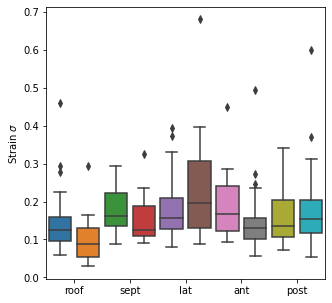

In [7]:
## boxplot 
fig, ((ax1)) = plt.subplots(1,1,figsize=(5,5), 
                            facecolor='white', sharey=True)

data_to_plot = [fib_std[:, 0], long_std[:, 0],
               fib_std[:, 1], long_std[:, 1],
               fib_std[:, 2], long_std[:, 2],
               fib_std[:, 3], long_std[:, 3],
               fib_std[:, 4], long_std[:, 4]]


sns.boxplot(data=data_to_plot, ax=ax1)

# for i in range(0, 10, 2):
#     mybox = ax1.artists[0]
#     mybox.set_facecolor('tab:blue')

# for i in range(1, 13, 2):
#     mybox = ax1.artists[i]
#     mybox.set_facecolor('tab:orange')

plt.ylabel("Strain $\sigma$")
plt.xticks(np.arange(0.5, 9.5, 2), regions)

([<matplotlib.axis.XTick at 0x7f4a5f712520>,
 [Text(0.5, 0, 'roof'),
  Text(2.5, 0, 'sept'),
  Text(4.5, 0, 'lat'),
  Text(6.5, 0, 'ant'),
  Text(8.5, 0, 'post')])

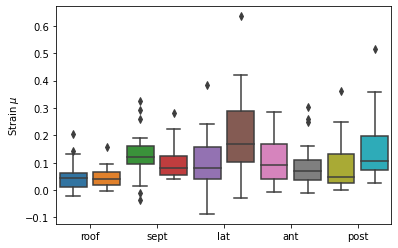

In [11]:
data_to_plot = [fib_mean[:, 0], long_mean[:, 0],
               fib_mean[:, 1], long_mean[:, 1],
               fib_mean[:, 2], long_mean[:, 2],
               fib_mean[:, 3], long_mean[:, 3],
               fib_mean[:, 4], long_mean[:, 4]]


sns.boxplot(data=data_to_plot)

plt.ylabel("Strain $\mu$")
plt.xticks(np.arange(0.5, 9.5, 2), regions)

Text(0, 0.5, 'longitudinal strain $\\sigma$')

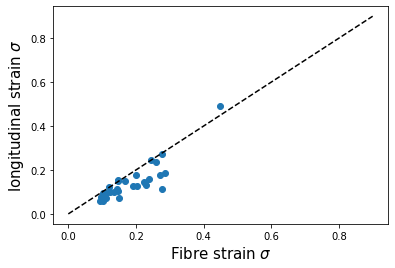

In [15]:
## Scatter plot enables one to look on a case by case basis
region=3

plt.scatter(fib_std[:, region], long_std[:, region])
plt.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

plt.xlabel("Fibre strain $\sigma$", fontsize=15)
plt.ylabel("longitudinal strain $\sigma$", fontsize=15)

Text(0, 0.5, 'longitudinal strain $\\mu$')

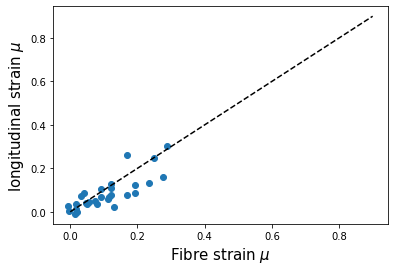

In [16]:
region=3

plt.scatter(fib_mean[:, region], long_mean[:, region])
plt.plot(np.arange(0,1,0.1), np.arange(0,1,0.1), ls='--', c='black')

plt.xlabel("Fibre strain $\mu$", fontsize=15)
plt.ylabel("longitudinal strain $\mu$", fontsize=15)

## Given Case

Look at entire strain distrbiution for a given case, e.g. case01

In [27]:

sample_df = retrieve_fibres_all_data("CT-CRT/case01", "endo_avg", 4)
sample_df.shape
df_ar = np.zeros((9, sample_df.shape[0], sample_df.shape[1]))

fib_archs = ["endo_1", "endo_2", "endo_3", "endo_4",
             "endo_5", "endo_6", "endo_7", "endo_avg"]

for i in range(0, len(fib_archs)):
    
    df_ar[i, ...] = retrieve_fibres_all_data("CT-CRT/case01", fib_archs[i], 4).to_numpy()

In [29]:
df_ar[-1, ...] = retrieve_fibres_all_data("CT-CRT/case01", fib_archs[i], 4, True).to_numpy()

In [30]:
sample_df.shape

(289521, 3)

In [31]:
data_to_plot = [df_ar[i, :, 0] for i in range(0, 9)]

<AxesSubplot:>

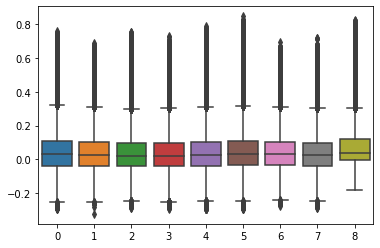

In [32]:
sns.boxplot(data=data_to_plot)

## For a given case, the global distrbiution of fiber strains seems to be faily consistent across fiber arhiectures.
## 
## Longitudinal strains seem to have smaller standard deviation
## However, for the longitudinal strains, there is less negative (contracting) strains.